# Building A Handwritten Digits Classifier

In this project, we'll:
+ explore why image classification is a hard task
+ observe the limitations of traditional machine learning models for image classification
+ train, test, and improve a few different deep neural networks for image classification

## Introduction 

Deep neural networks have been used to reach state-of-the-art performance on **image classification** tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark.

In this project, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).

**Why is image classifcation a hard task?**

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to [grayscale](https://en.wikipedia.org/wiki/Grayscale) (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:

![](https://s3.amazonaws.com/dq-content/244/single_image.svg)

**Why is deep learning effective in image classification?**

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification which was trained to identify faces.

![](https://s3.amazonaws.com/dq-content/244/nn_learns_hierarchy.png)

We'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

## Working With Image Data

Scikit-learn contains a number of [datasets](https://scikit-learn.org/stable/datasets/index.html) pre-loaded with the library, within the namespace of `sklearn.datasets`. The [`load_digits()` function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits_data['target'])

In [4]:
data = pd.DataFrame(digits_data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array and pass the result into that into the [numpy.reshape()](https://app.dataquest.io/m/244/guided-project%3A-building-a-handwritten-digits-classifier/2/working-with-image-data) function. Now that the data is in the right shape, we can visualize it using [pyplot.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=matplotlib%20pyplot%20imshow#matplotlib.pyplot.imshow) function:

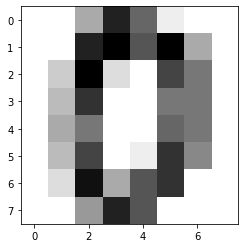

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

To display multiple images in one matplotlib figure, we can use the equivalent [axes.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html?highlight=axes%20imshow#matplotlib.axes.Axes.imshow) function.

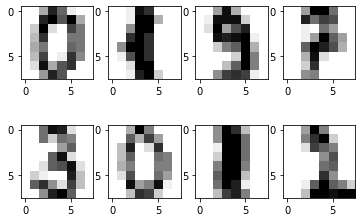

In [6]:
fig, axs = plt.subplots(2, 4)

axs[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axs[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axs[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axs[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axs[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axs[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axs[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axs[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. K-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_knn(nneighbors, train_features, train_labels):
    
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    
    return knn

def test(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    return accuracy

def cross_validate(k):
    
    fold_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies

knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9827456075228903

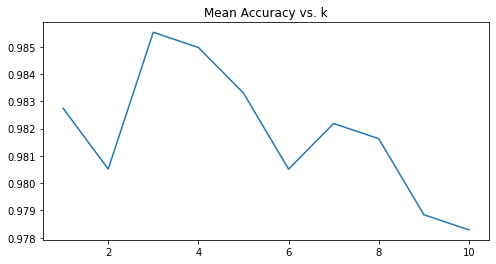

In [8]:
k_values = [x for x in range(1,11)]
knn_accuracies = []

for k in k_values:
    knn_k_accuracy = cross_validate(k)
    accuracy = np.mean(knn_k_accuracy)
    knn_accuracies.append(accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, knn_accuracies)

There are a few downsides to using k-nearest neighbors:

+ high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
+ no model representation to debug and explore

## Neural Network With One Hidden Layer

Let's now try a neural network with a single hidden layer. We'll use the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) package from scikit-learn.

In [9]:
from sklearn.neural_network import MLPClassifier

def train_nn(neurons, train_features, train_labels):
    
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), activation='logistic')
    mlp.fit(train_features, train_labels)
    
    return mlp

def test_nn(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    return accuracy

def cross_validate_nn(neurons):
    
    fold_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies

In [10]:
neurons = [8, 16, 32, 64, 128, 256]

nn_accuracies = []

for i in neurons:
    nn_n_accuracy = cross_validate_nn(i)
    accuracy = np.mean(nn_n_accuracy)
    nn_accuracies.append(accuracy)
    
nn_accuracies

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.9226515713932195,
 0.9560319227913883,
 0.9688307349665923,
 0.9760678049987627,
 0.977735708982925,
 0.9771801534273695]

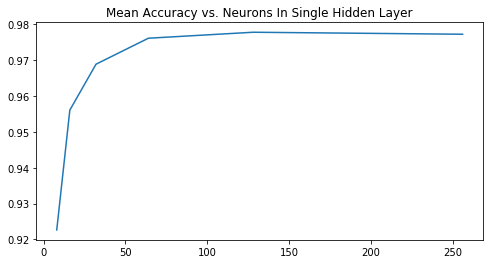

In [11]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, nn_accuracies)

## Neural Network With Two Hidden Layers

Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [12]:
def train_nn_thl(neurons, train_features, train_labels):
    
    mlp = MLPClassifier(hidden_layer_sizes=(neurons, neurons), activation='logistic')
    mlp.fit(train_features, train_labels)
    
    return mlp

def test_nn_thl(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    return accuracy

def cross_validate_nn_thl(neurons):
    
    fold_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_thl(neurons, train_features, train_labels)
        overall_accuracy = test_nn_thl(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies

In [13]:
neurons = [8, 16, 32, 64, 128, 256]

nn_thl_accuracies = []

for i in neurons:
    nn_thl_accuracy = cross_validate_nn_thl(i)
    accuracy = np.mean(nn_thl_accuracy)
    nn_thl_accuracies.append(accuracy)
    
nn_thl_accuracies

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.7946547884187083,
 0.9315590200445434,
 0.9666097500618659,
 0.9660529571888147,
 0.9732863152684978,
 0.976066567681267]

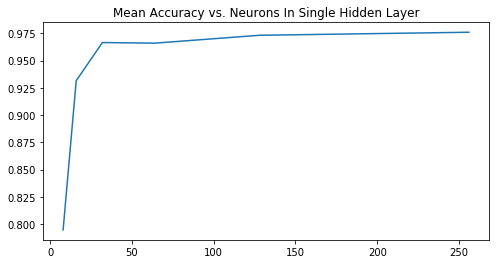

In [14]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, nn_thl_accuracies)

## Neural Network With Three Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [15]:
def train_nn_3hl(neurons, train_features, train_labels):
    
    mlp = MLPClassifier(hidden_layer_sizes=(neurons, neurons, neurons), activation='logistic')
    mlp.fit(train_features, train_labels)
    
    return mlp

def test_nn_3hl(model, test_features, test_labels):
    
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    
    return accuracy

def cross_validate_nn_3hl(neurons):
    
    fold_accuracies = []
    kf = KFold(n_splits=6, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn_3hl(neurons, train_features, train_labels)
        overall_accuracy = test_nn_3hl(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    
    return fold_accuracies

In [17]:
neurons = [8, 16, 32, 64, 128, 256]

nn_3hl_accuracies = []

for i in neurons:
    nn_3hl_accuracy = cross_validate_nn_3hl(i)
    accuracy = np.mean(nn_3hl_accuracy)
    nn_3hl_accuracies.append(accuracy)
    
nn_3hl_accuracies

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

[0.6082943143812709,
 0.8575399479747307,
 0.9554868078781124,
 0.9721850613154962,
 0.9760720921590487,
 0.9782961724266072]

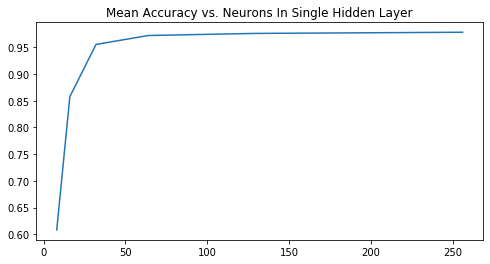

In [18]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, nn_3hl_accuracies)